<a href="https://colab.research.google.com/github/Ashan-TUF/Regression_with_TensorFlow/blob/main/Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install opendatasets

In [16]:
import pandas as pd #To work with our dataset
import matplotlib.pyplot as plt #For data visualization
import tensorflow as tf #To build a neural network
import opendatasets as od #To download a dataset from Kaggle

Download Dataset

In [18]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression") #This is a link to a Kaggle dataset.

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ashankavinduai
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andonians/random-linear-regression


100%|██████████| 7.63k/7.63k [00:00<00:00, 6.24MB/s]

In [19]:
data = pd.read_csv("random-linear-regression/test.csv")

In [21]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [22]:
data.shape

(300, 2)

In [23]:
x = data['x']
y = data['y']

In [24]:
x

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


In [25]:
y

,y
0,79.775152
1,23.177279
2,25.609262
3,17.857388
4,41.849864
...,...
295,68.545888
296,47.334876
297,54.090637
298,63.297171


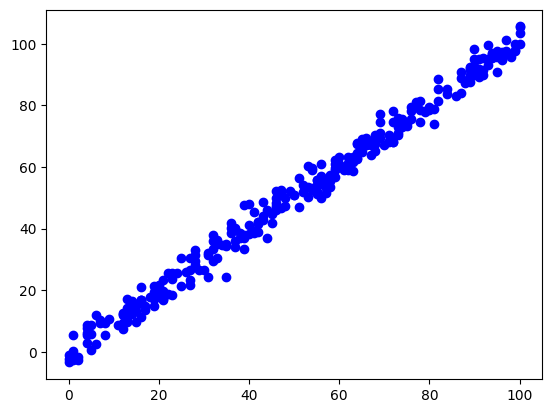

In [26]:
plt.scatter(x,y,c ='b') #'b' is the color blue
plt.show()

###Make Train dataset and Test dataset

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [28]:
x_train.shape,x_test.shape

((240,), (60,))

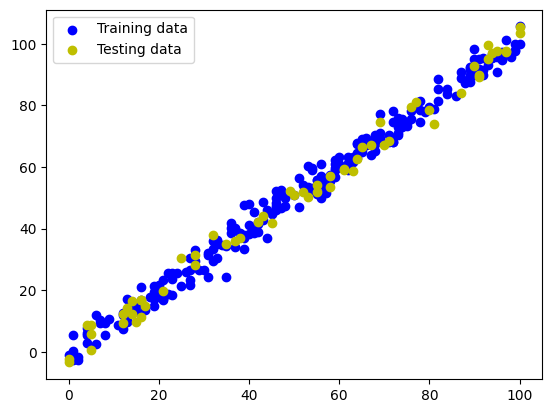

In [29]:
plt.scatter(x_train,y_train, c='b', label= 'Training data')
plt.scatter(x_test,y_test, c='y', label = 'Testing data')
plt.legend()
plt.show()

#Model Building

In [111]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
    ])

# compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.05),
              metrics = ['mae'])

# train model
epoch_number = 10
history = model.fit(tf.expand_dims(x_train, axis=1), y_train, epochs= epoch_number)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 50.8211 - mae: 50.8211
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.9373 - mae: 15.9373 
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3116 - mae: 7.3116 
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6547 - mae: 5.6547 
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5584 - mae: 3.5584 
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8446 - mae: 2.8446 
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5778 - mae: 2.5778 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8599 - mae: 2.8599 
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8489 - mae: 2.8489 
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6693 - mae: 2.6693 


In [96]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,349 (16.99 KB)

 Trainable params: 1,449 (5.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,900 (11.33 KB)

In [97]:
y_predictions = model.predict(x_test)
y_predictions[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[94.05549  ],
       [79.39523  ],
       [98.24411  ],
       [ 5.0468273],
       [95.10264  ]], dtype=float32)

In [98]:
y_test.head(5)

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


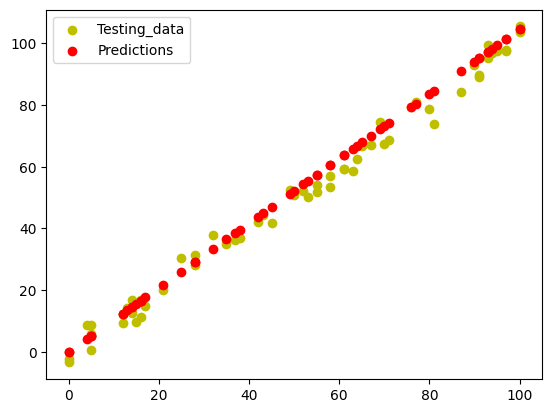

In [99]:
# plt.scatter(x_train,y_train, c= 'b', label = 'Training_data')
plt.scatter(x_test, y_test, c= 'y', label = 'Testing_data')
plt.scatter(x_test, y_predictions, c= 'r', label = 'Predictions')
plt.legend()
plt.show()

In [100]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.0756 - mae: 3.0756 


[3.158698320388794, 3.158698320388794]

In [88]:
# Using MAE (Mean Absolute Error)
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mae_metric.update_state(y_test, tf.squeeze(y_predictions))
mae = mae_metric.result().numpy()
mae

np.float32(4.87841)

In [89]:
# Using MSE (Mean Squared Error)
mse_metric = tf.keras.metrics.MeanSquaredError()
mse_metric.update_state(y_test, tf.squeeze(y_predictions))
mse = mse_metric.result().numpy()
mae

np.float32(4.87841)

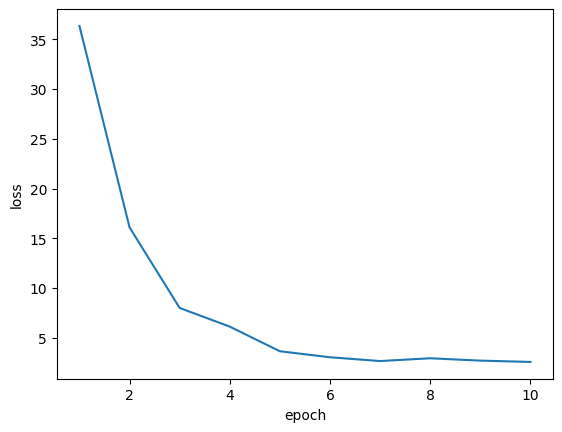

In [112]:
x_range = range(1, epoch_number +1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [114]:
for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[ 2.04348490e-02  1.34352073e-01  8.40748176e-02 -2.59868711e-01
  -2.68945664e-01  5.98362423e-02 -1.40216132e-03 -1.00775175e-01
  -2.34019741e-01 -5.16703762e-02 -1.58069693e-02 -2.20634900e-02
  -5.09102792e-02  1.23018615e-01 -1.73389539e-01  3.32564384e-01
   4.50575463e-02  2.02998057e-01  8.78631696e-02  3.83154191e-02
  -2.13368639e-01  6.23848587e-02  1.38524512e-04  6.89279586e-02
  -4.95438650e-03 -1.25771407e-02 -2.61478294e-02  2.16018364e-01
   4.52391990e-02 -1.30929397e-02  3.71142477e-02 -1.79040134e-01
  -1.04126520e-01  7.81586953e-03  3.46924365e-03  1.77764962e-03
  -6.69081882e-03  3.36505547e-02  1.65759660e-02 -1.65578481e-02
  -2.56531071e-02 -4.73568914e-04  7.19678253e-02 -4.58122715e-02
   2.76031226e-01 -1.71206798e-02 -3.71486582e-02  7.99848512e-02
   1.64461747e-01 -1.48493033e-02  3.23585942e-02  1.98950022e-01
   1.51725775e-02  6.32701516e-02  1.16290641e-03 -8.79778527e-03
   1.71973526e-01  1.64156154e-01  1.58293918e-02  9.19462889e-02